<a href="https://colab.research.google.com/github/Ferhadaghayev/Students-Performance/blob/main/Students_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

In [134]:
df = pd.read_csv("/content/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


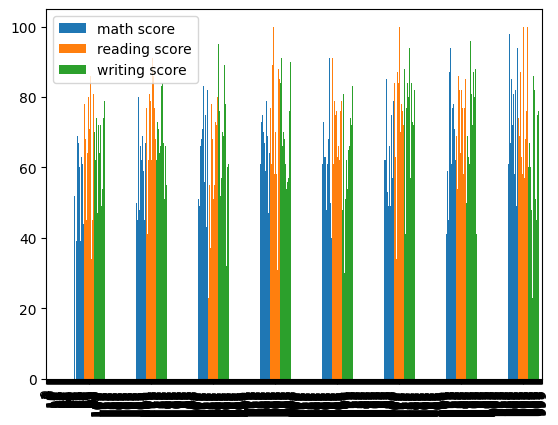

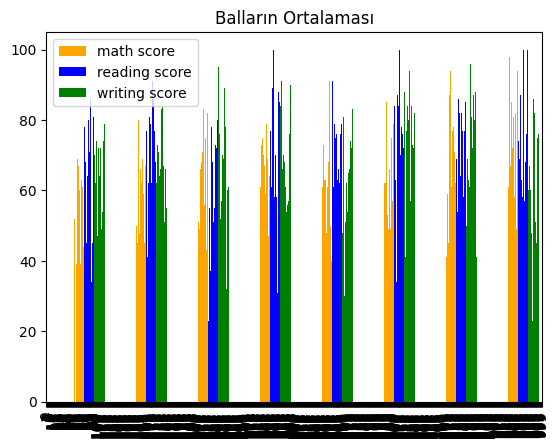

In [135]:
colors = ['orange','blue','green']  #Balların Ortalaması
df.plot(kind='bar',linewidth=2)
df.plot(kind='bar', color=colors)
plt.title("Balların Ortalaması")
plt.show()

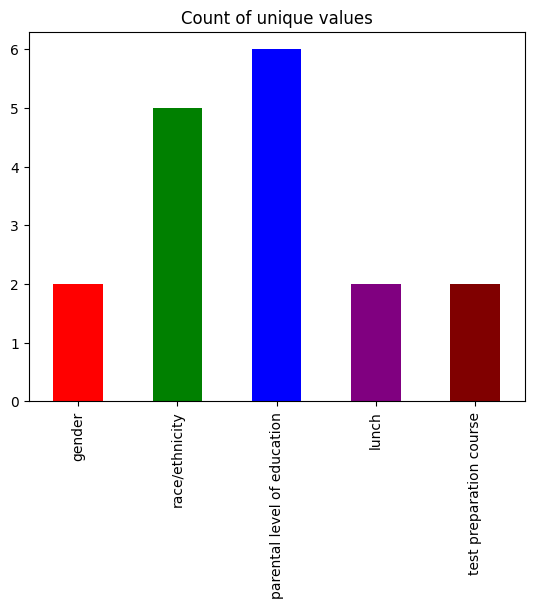

In [136]:
colors=['red','green','blue','purple','maroon']  #UNIQUE 	dəyərlərin sayı
df.select_dtypes(include='object').nunique().plot(kind='bar',color=colors)
plt.title("Count of unique values")
plt.show()

In [137]:
for col in ['gender','race/ethnicity','parental level of education','test preparation course','lunch']:  #Hər qrupda male/female sayı
    print(df[col].value_counts())
    print()

gender
female    518
male      482
Name: count, dtype: int64

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

test preparation course
none         642
completed    358
Name: count, dtype: int64

lunch
standard        645
free/reduced    355
Name: count, dtype: int64



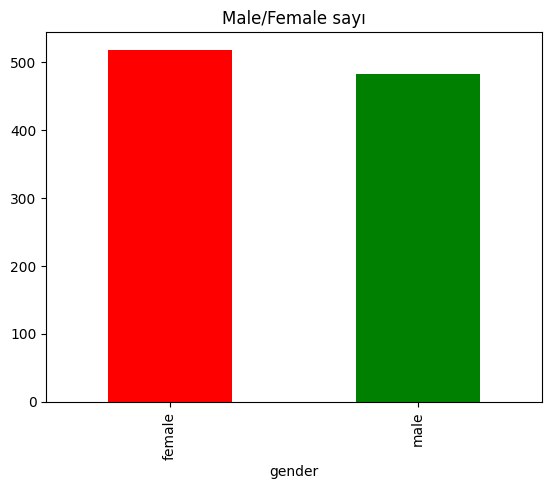

In [138]:
df['gender'].value_counts().plot(kind='bar',color=['red', 'green'])   #Hər qrupda male/female sayı
plt.title("Male/Female sayı")
plt.show()

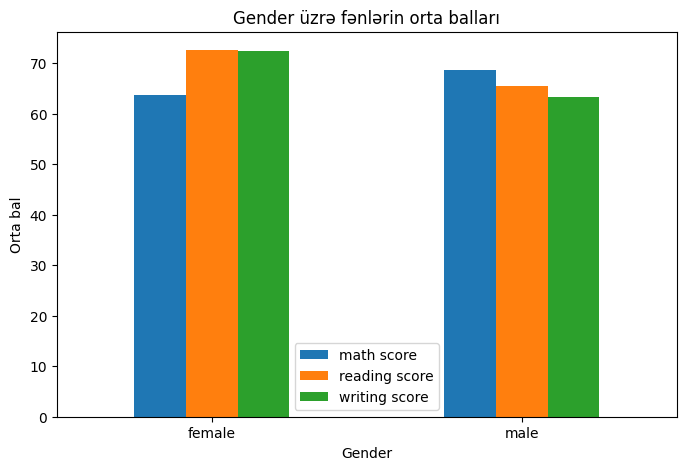

In [139]:
df.groupby('gender')[['math score','reading score','writing score']].mean().plot(kind='bar',figsize=(8,5)) #Gender üzrə fənlərin ortalaması

plt.title("Gender üzrə fənlərin orta balları")
plt.ylabel("Orta bal")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.show()

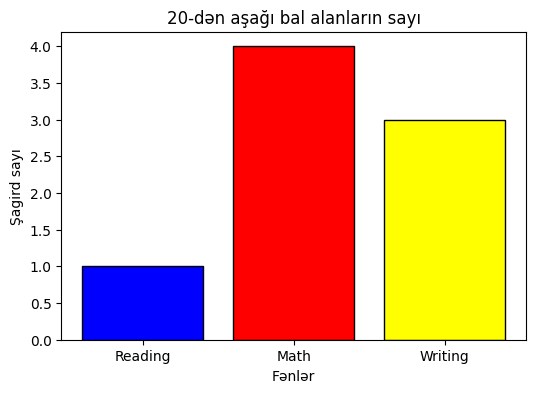

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

#20-dən aşağı bal alanların sayı
reading_full = (df['reading score'] < 20).sum()
math_full = (df['math score'] < 20).sum()
writing_full = (df['writing score'] < 20).sum()

result = pd.DataFrame({
    'Subject': ['Reading', 'Math', 'Writing'],
    'Count': [reading_full, math_full, writing_full]
})

colors = ['blue', 'red', 'yellow']

plt.figure(figsize=(6,4))
plt.bar(result['Subject'], result['Count'], color=colors, edgecolor='black')

plt.title("20-dən aşağı bal alanların sayı")
plt.ylabel("Şagird sayı")
plt.xlabel("Fənlər")
plt.show()

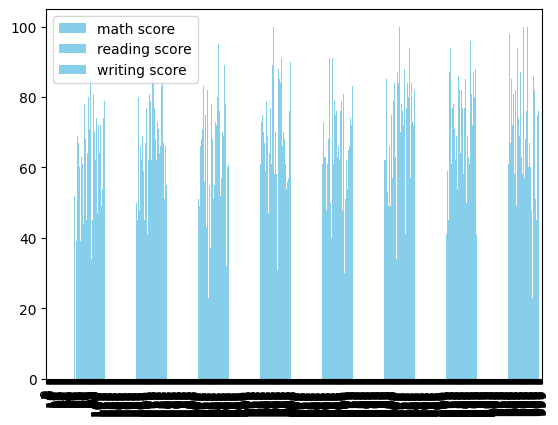

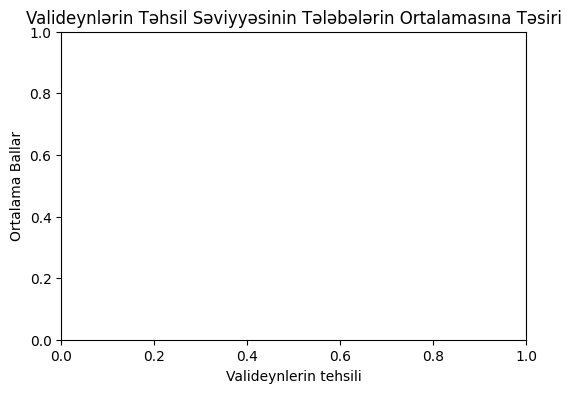

In [141]:
df.plot(kind='bar', color='skyblue')
plt.figure(figsize=(6,4))
plt.title("Valideynlərin Təhsil Səviyyəsinin Tələbələrin Ortalamasına Təsiri")
plt.ylabel("Ortalama Ballar")
plt.xlabel("Valideynlerin tehsili")
plt.show()

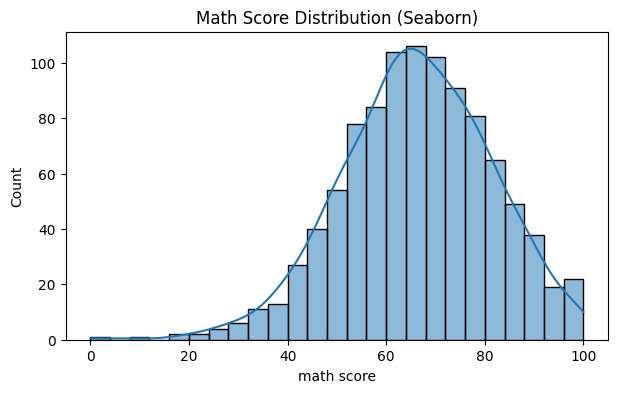

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
sns.histplot(df['math score'],kde=True)
plt.title("Math Score Distribution (Seaborn)")
plt.show()

In [143]:
df['Average Score']=(df['math score']+df['reading score']+df['writing score'])/3

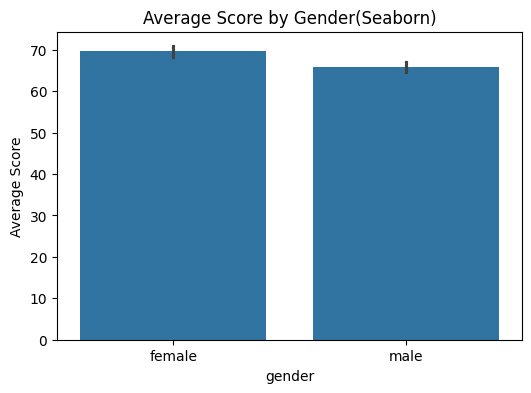

In [144]:
plt.figure(figsize=(6,4))
sns.barplot(data=df,x='gender',y='Average Score')
plt.title("Average Score by Gender(Seaborn)")
plt.show()

In [145]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


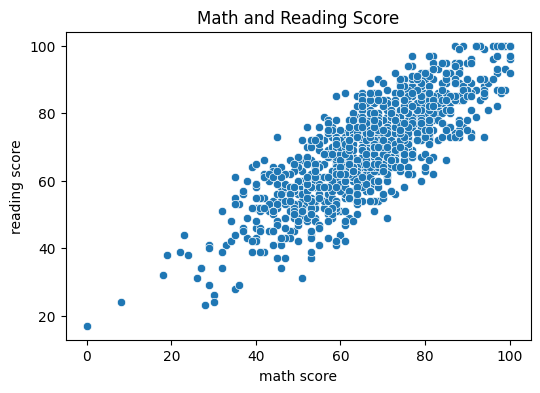

In [146]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x='math score',y='reading score')
plt.title("Math and Reading Score")
plt.show()

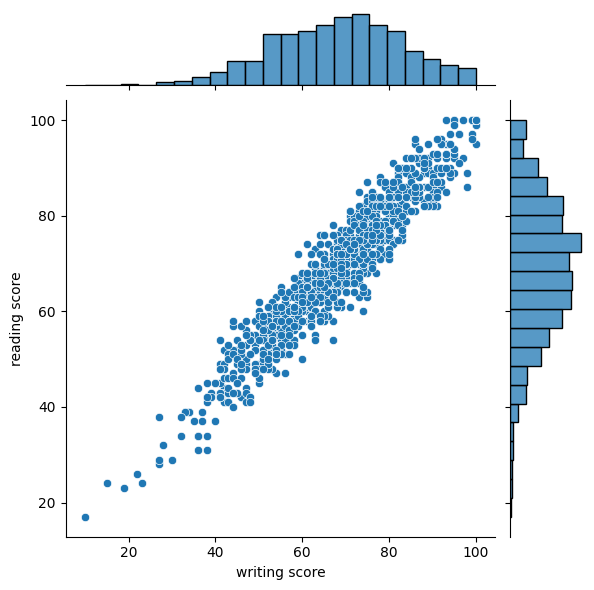

In [147]:
sns.jointplot(data=df,x='writing score',y='reading score',kind='scatter',height=6) #Reading və writing elaqesi

<function matplotlib.pyplot.show(close=None, block=None)>

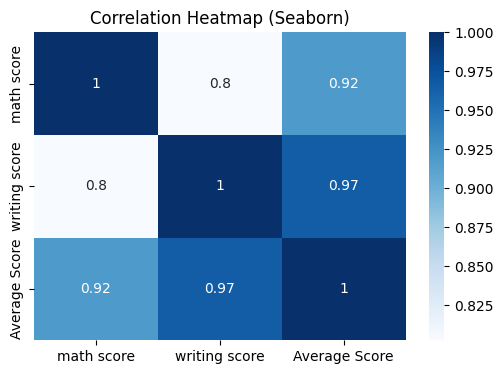

In [148]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['math score','writing score','Average Score']].corr(),annot=True,cmap='Blues')
plt.title("Correlation Heatmap (Seaborn)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

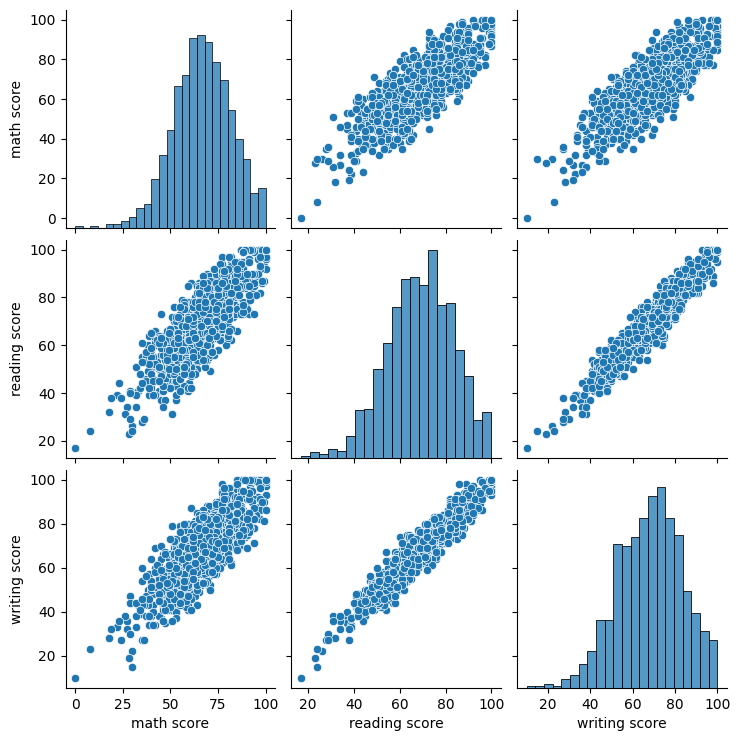

In [149]:
sns.pairplot(df[['math score','reading score','writing score']]) #Hər tələbənin math,reading və writing-dən neçə bal aldığına baxırıq
plt.show

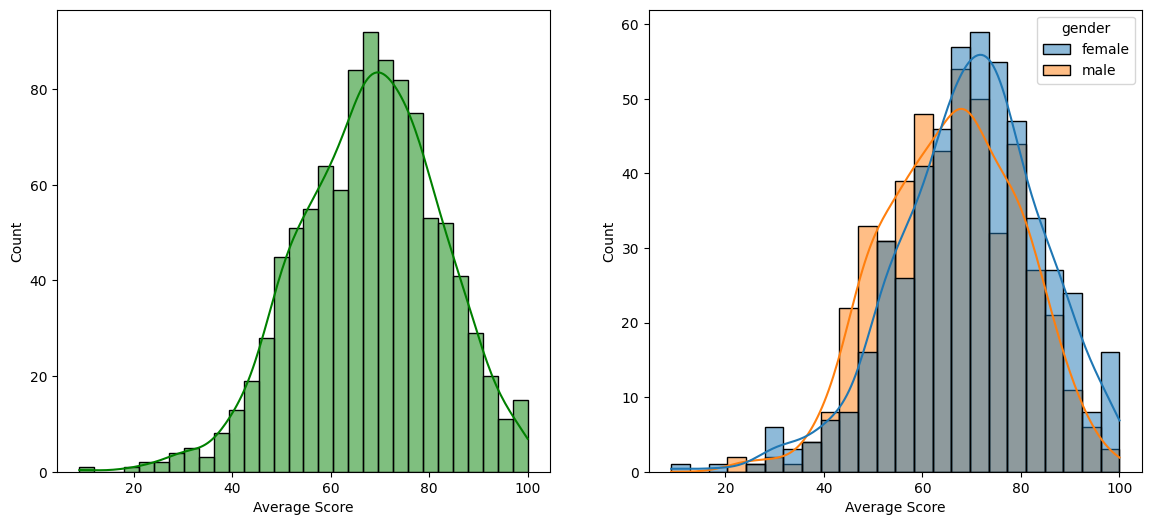

In [150]:
#MALE və FEMALE ayrı-ayrılıqda ortalamalarını göstəririk,subplot funksiyası 2 ve daha artiq vizual vermeye imkan verir
fig,axs=plt.subplots(1,2,figsize=(14,6))
plt.subplot(121)
sns.histplot(data=df,x='Average Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average Score',kde=True,hue='gender')
plt.show()

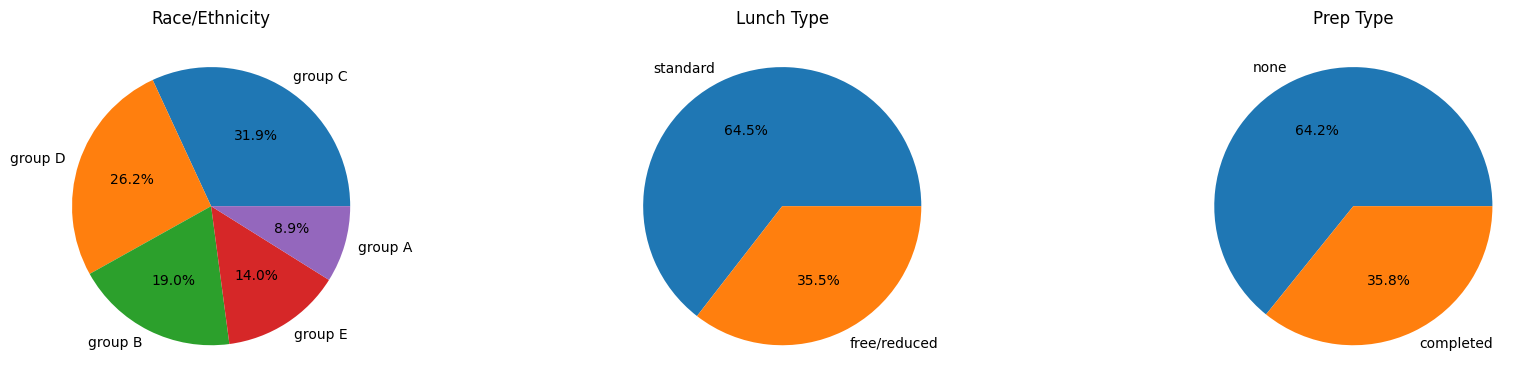

In [151]:
race_counts=df['race/ethnicity'].value_counts()
lunch_counts=df['lunch'].value_counts()
prep_counts=df['test preparation course'].value_counts()

plt.figure(figsize=(18,4))

#Gender
plt.subplot(1,3,1)
plt.pie(race_counts,labels=race_counts.index,autopct="%1.1f%%")
plt.title("Race/Ethnicity")

#Race/Ethnicity
plt.subplot(1,3,2)
plt.pie(lunch_counts,labels=lunch_counts.index,autopct="%1.1f%%")
plt.title("Lunch Type")

#Lunch
plt.subplot(1,3,3)
plt.pie(prep_counts,labels=prep_counts.index,autopct="%1.1f%%")
plt.title("Prep Type")

plt.tight_layout()
plt.show()

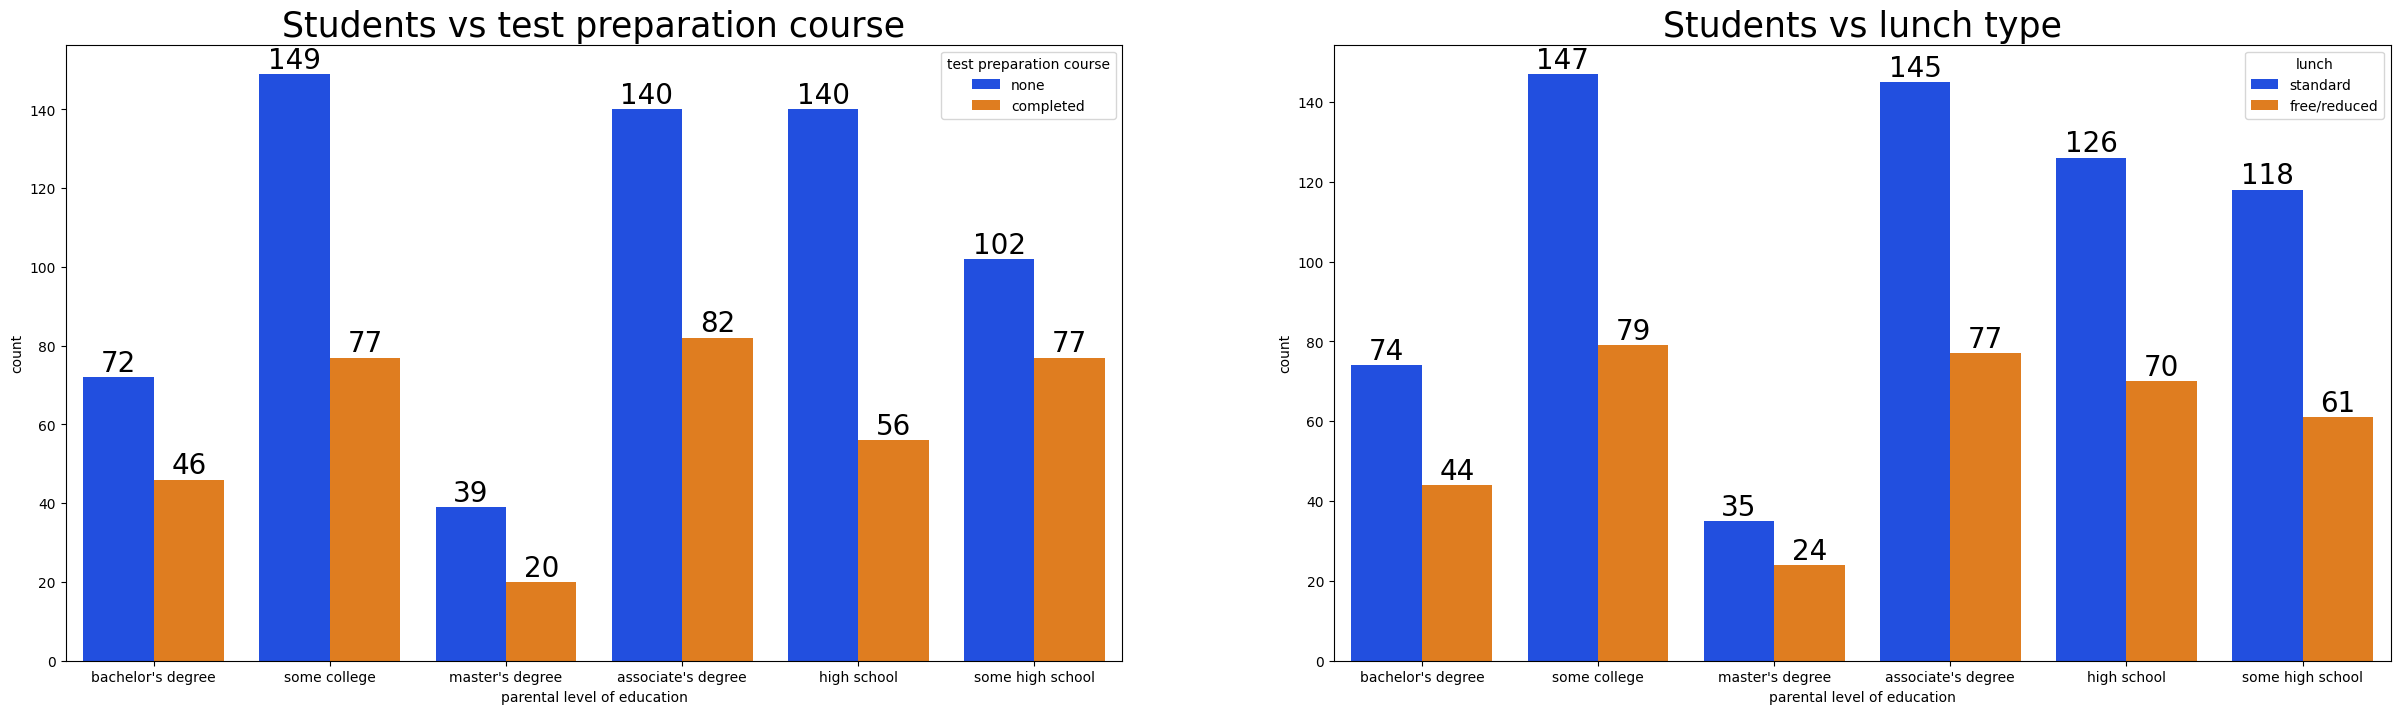

In [169]:
#valideynlerin tehsil seviyyesine gore lunch növləri
f,ax=plt.subplots(1,2,figsize=(30,8))
sns.countplot(x=df['parental level of education'],data=df,palette='bright',hue='test preparation course',ax=ax[0])
ax[0].set_title('Students vs test preparation course',color='black',size=25)
for container in ax[0].containers:
  ax[0].bar_label(container,color='black',size=20)

sns.countplot(x=df['parental level of education'],data=df,palette='bright',hue='lunch',ax=ax[1])
ax[1].set_title('Students vs lunch type',color='black',size=25)
for container in ax[1].containers:
  ax[1].bar_label(container,color='black',size=20)